Imports of necessary libs

In [216]:
import os
import requests

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

Checking ../Data directory presence

In [217]:
if not os.path.exists('../Data'):
    os.mkdir('../Data')


Download data if it is unavailable

In [218]:
if 'data.csv' not in os.listdir('../Data'):
    url = "https://www.dropbox.com/s/3cml50uv7zm46ly/data.csv?dl=1"
    r = requests.get(url, allow_redirects=True)
    open('../Data/data.csv', 'wb').write(r.content)

Read data

In [219]:
data = pd.read_csv('../Data/data.csv')

Stage 1/5 Assigning the linear regression model

In [220]:
model = LinearRegression()

Extraction the data from DataFrame (X cannot be a series so shaping it back to frame)

In [221]:
X, y = data['rating'].to_frame(), data['salary']

Splitting the data to test and train samples

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Training the model

In [223]:
model.fit(X_train, y_train)

LinearRegression()

Predictions, on test and training data

In [224]:
Y_predict_train = model.predict(X_train)
Y_predict_test = model.predict(X_test)

Calculation of the "mean absolute percentage error"

In [225]:
task_mape = mape(y_test, Y_predict_test)

Extraction of the coefficients and intercept

In [226]:
a_coef = model.coef_
b_coef = model.intercept_

Stage 2/5

Transformation of the predictor (in powers: 2, 3, 4)

In [227]:
X_p2, X_p3, X_p4 = X ** 2, X ** 3, X ** 4

Splitting the data to test and train samples

In [228]:
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(X_p2, y, test_size=0.3, random_state=100)
X_train_p3, X_test_p3, y_train_p3, y_test_p3 = train_test_split(X_p3, y, test_size=0.3, random_state=100)
X_train_p4, X_test_p4, y_train_p4, y_test_p4 = train_test_split(X_p4, y, test_size=0.3, random_state=100)

Training the model

In [229]:
model_p2, model_p3, model_p4 = LinearRegression(), LinearRegression(), LinearRegression()
model_p2.fit(X_train_p2, y_train_p2)
model_p3.fit(X_train_p3, y_train_p3)
model_p4.fit(X_train_p4, y_train_p4)

LinearRegression()

Predictions:

In [230]:
Y_predict_test_p2 = model_p2.predict(X_test_p2)
Y_predict_test_p3 = model_p3.predict(X_test_p3)
Y_predict_test_p4 = model_p4.predict(X_test_p4)

Calculation of the "mean absolute percentage error"

In [231]:
mape_p2 = mape(y_test_p2, Y_predict_test_p2)
mape_p3 = mape(y_test_p3, Y_predict_test_p3)
mape_p4 = mape(y_test_p4, Y_predict_test_p4)

Visualizing

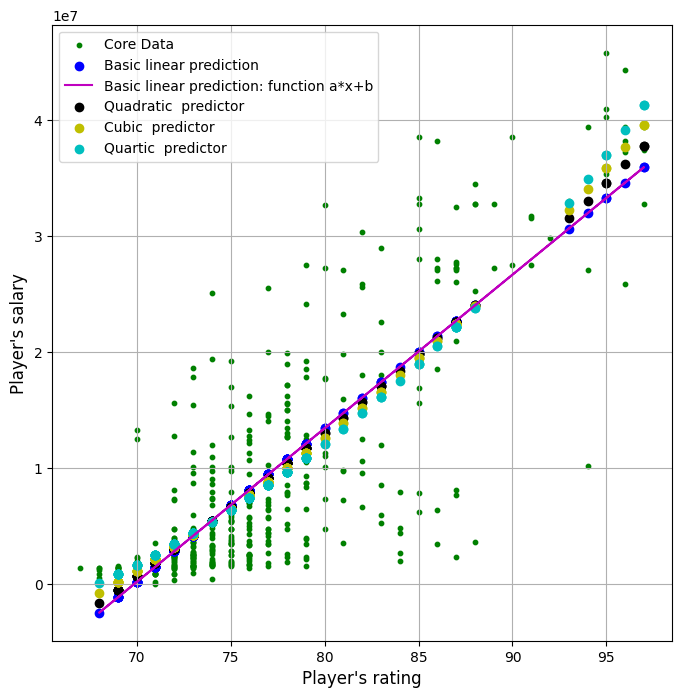

In [232]:
fig, axes = plt.subplots(figsize=(8, 8))
axes.scatter(data['rating'], data['salary'], s=10, c='g', label='Core Data')
axes.scatter(X_test, Y_predict_test, c='b', label='Basic linear prediction')
axes.plot(X_test, [a_coef * X_test.iloc[i] + b_coef for i in range(len(X_test))],
          c='m',
          label='Basic linear prediction: function a*x+b')
axes.set_ylabel("Player's salary", fontsize=12)
axes.set_xlabel("Player's rating", fontsize=12)
axes.grid()
axes.scatter(X_test, Y_predict_test_p2, c='k', label='Quadratic  predictor')
axes.scatter(X_test, Y_predict_test_p3, c='y', label='Cubic  predictor')
axes.scatter(X_test, Y_predict_test_p4, c='c', label='Quartic  predictor')
axes.legend()
plt.show()

Stage 3/5

Assigning the linear regression model

In [233]:
multy_model = LinearRegression()

Extraction the data from DataFrame

In [234]:
X_m, y_m = data.drop(['salary'], axis=1), data['salary']

Splitting the data to test and train samples

In [235]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.3, random_state=100)

Training the model

In [236]:
multy_model.fit(X_m_train, y_m_train)

LinearRegression()

Extraction of the coefficients and intercept

In [237]:
w_coef = multy_model.coef_
w0_coef = multy_model.intercept_

Stage 4/5

In [238]:
def corr_model(predictor, target, max_corr=0.2):

    X_train, X_test, y_train, y_test = (
        train_test_split(predictor, target, test_size=0.3, random_state=100))
    corr = predictor.corr()
    high_corr = (corr
                 .where((corr > max_corr) & (corr != 1.0))
                 .dropna(how='all')
                 .dropna(axis=1, how='all')
                 .columns.tolist())
    model = LinearRegression()
    mape_list = []

    for i in range(len(high_corr)):

        Train_x = X_train.drop([high_corr[i]], axis=1)
        Test_x = X_test.drop([high_corr[i]], axis=1)
        model.fit(Train_x, y_train)
        Y_predict_test = model.predict(Test_x)
        m = mape(y_test, Y_predict_test)
        mape_list.append(m)
        print(Train_x.head(), m)
        for j in range(i + 1, len(high_corr)):
            Train_x = X_train.drop([high_corr[i], high_corr[j]], axis=1)
            Test_x = X_test.drop([high_corr[i], high_corr[j]], axis=1)
            model.fit(Train_x, y_train)
            Y_predict_test = model.predict(Test_x)
            m = mape(y_test, Y_predict_test)
            mape_list.append(m)
            print(Train_x.head(), m)
    return min(mape_list).round(5)

In [239]:
corr_model(X_m, y_m)
print(corr_model(X_m, y_m))

     draft_round  age  experience        bmi
151            1   24           5  23.729852
260            1   28           6  24.479592
140            1   22           2  22.504353
217            1   34          12  22.367808
117            1   21           2  27.688755 2.707355066874802
     draft_round  experience        bmi
151            1           5  23.729852
260            1           6  24.479592
140            1           2  22.504353
217            1          12  22.367808
117            1           2  27.688755 2.676629956561689
     draft_round  age        bmi
151            1   24  23.729852
260            1   28  24.479592
140            1   22  22.504353
217            1   34  22.367808
117            1   21  27.688755 2.9659652418844282
     rating  draft_round  experience        bmi
151      77            1           5  23.729852
260      74            1           6  24.479592
140      77            1           2  22.504353
217      75            1          12  22.3678

Stage 5/5

In [240]:
X_train, X_test, y_train, y_test = (
    train_test_split(X_m, y_m, test_size=0.3, random_state=100))

Train_x = X_train.drop(['age', 'experience'], axis=1)
Test_x = X_test.drop(['age', 'experience'], axis=1)
model.fit(Train_x, y_train)
Y_predict_test_0 = model.predict(Test_x)
Y_predict_test_m = model.predict(Test_x)
Y_predict_test_0[Y_predict_test_0 < 0] = 0
Y_predict_test_m[Y_predict_test_m < 0] = np.mean(Y_predict_test_m)
m_0 = mape(y_test, Y_predict_test_0)
m_m = mape(y_test, Y_predict_test_m)
print(min(m_0, m_m).round(5))

0.94701
